In [1]:
import tensorflow as tf

In [2]:
directory= './PCOS/data/train'

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np
import os
import pandas as pd

In [6]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1924 files belonging to 2 classes.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<ipython-input-8-671086a2bd33>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(6, 6, i + 1)


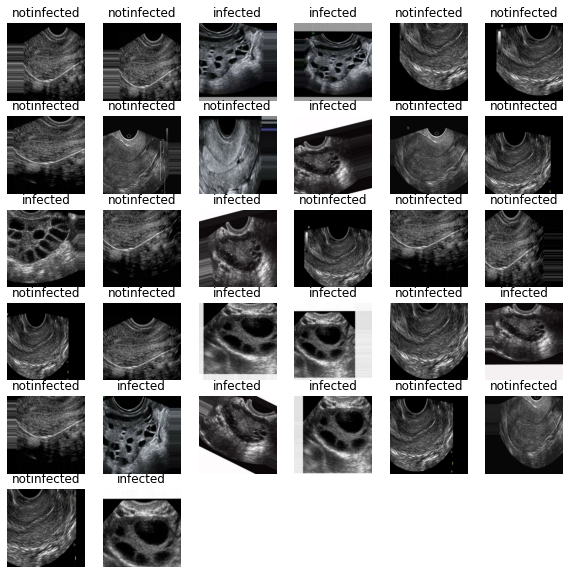

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=30,
                             validation_split=0.3,
                             fill_mode='nearest'
                             )
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory( directory, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='training',
                                       seed=24)
# prepare an iterators for each dataset
val_it = datagen.flow_from_directory( directory, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='validation',
                                       seed=24)

Found 1348 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [10]:
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchy.shape, batchy.min(), batchy.max()))
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(100, 2), min=0.000, max=1.000
Batch shape=(100, 224, 224, 3), min=0.000, max=1.000


In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

# Inception V3 - sigmoid activation function

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model=InceptionV3()
for layer in base_model.layers:
    layer.trainable= False
x= Flatten()(base_model.output)
x= Dense(units=2,activation= 'sigmoid')(x)
model=Model(base_model.input,x)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [14]:
train_it.class_indices

{'infected': 0, 'notinfected': 1}

In [15]:
history = model.fit( 
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5
14/14 [==============================] - 193s 13s/step - loss: 0.6860 - accuracy: 0.6083 - val_loss: 0.6817 - val_accuracy: 0.6910
Epoch 2/5
14/14 [==============================] - 212s 16s/step - loss: 0.6779 - accuracy: 0.7003 - val_loss: 0.6723 - val_accuracy: 0.7361
Epoch 3/5
14/14 [==============================] - 228s 17s/step - loss: 0.6685 - accuracy: 0.7277 - val_loss: 0.6630 - val_accuracy: 0.7222
Epoch 4/5
14/14 [==============================] - 215s 16s/step - loss: 0.6608 - accuracy: 0.7136 - val_loss: 0.6568 - val_accuracy: 0.7101
Epoch 5/5
14/14 [==============================] - 273s 20s/step - loss: 0.6525 - accuracy: 0.7055 - val_loss: 0.6510 - val_accuracy: 0.6944


Text(0.5, 1.0, 'Loss vs Accuracy')

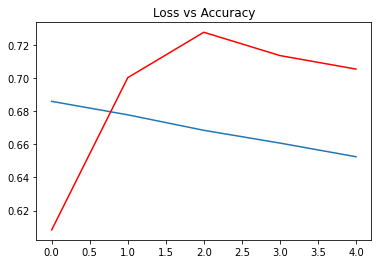

In [16]:
h=history.history
h.keys()
plt.plot(h['loss'])
plt.plot(h['accuracy'],c='r')
plt.title("Loss vs Accuracy")

## Inception V3 - softmax activation function

In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model=InceptionV3()
for layer in base_model.layers:
    layer.trainable= False
x= Flatten()(base_model.output)
x= Dense(units=2,activation=tf.nn.softmax)(x)
model=Model(base_model.input,x)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [18]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

 batch_normalization_99 (BatchN  (None, 35, 35, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 35, 35, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 35, 35, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 35, 35, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 35, 35, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 17, 17, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 17, 17, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 17, 17, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 17, 17, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 17, 17, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 17, 17, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 8, 8, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 8, 8, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 8, 8, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [19]:
train_it.class_indices

{'infected': 0, 'notinfected': 1}

In [20]:
history = model.fit( 
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5
14/14 [==============================] - 205s 14s/step - loss: 0.6882 - accuracy: 0.6016 - val_loss: 0.6842 - val_accuracy: 0.6424
Epoch 2/5
14/14 [==============================] - 173s 12s/step - loss: 0.6791 - accuracy: 0.6521 - val_loss: 0.6757 - val_accuracy: 0.6476
Epoch 3/5
14/14 [==============================] - 169s 12s/step - loss: 0.6707 - accuracy: 0.6469 - val_loss: 0.6667 - val_accuracy: 0.6441
Epoch 4/5
14/14 [==============================] - 165s 12s/step - loss: 0.6631 - accuracy: 0.6395 - val_loss: 0.6607 - val_accuracy: 0.6337
Epoch 5/5
14/14 [==============================] - 1077s 82s/step - loss: 0.6559 - accuracy: 0.6447 - val_loss: 0.6536 - val_accuracy: 0.6354


Text(0.5, 1.0, 'Loss vs Accuracy')

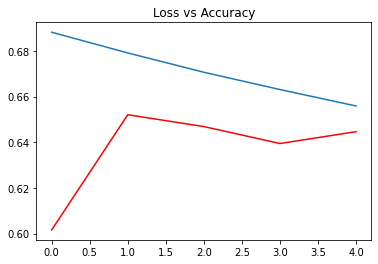

In [21]:
h=history.history
h.keys()
plt.plot(h['loss'])
plt.plot(h['accuracy'],c='r')
plt.title("Loss vs Accuracy")

## Inception V3 - Linear activation function

In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model=InceptionV3()
for layer in base_model.layers:
    layer.trainable= False
x= Flatten()(base_model.output)
x= Dense(units=2,activation='linear')(x)
model=Model(base_model.input,x)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [23]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 149, 149, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

 batch_normalization_193 (Batch  (None, 35, 35, 64)  192         ['conv2d_193[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_195 (Batch  (None, 35, 35, 64)  192         ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_198 (Batch  (None, 35, 35, 96)  288         ['conv2d_198[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 35, 35, 32)  96          ['conv2d_199[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_210 (Batch  (None, 35, 35, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_210 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_210[0][0]']
                                                                                                  
 conv2d_208 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_211 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_210[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_214[0][0]',         
                                                                  'activation_217[0][0]',         
                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_222 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_nor

                                                                  'activation_226[0][0]',         
                                                                  'activation_227[0][0]']         
                                                                                                  
 conv2d_232 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_232 (Batch  (None, 17, 17, 160)  480        ['conv2d_232[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_232 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_23

 batch_normalization_242 (Batch  (None, 17, 17, 160)  480        ['conv2d_242[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_242 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_242[0][0]']
                                                                                                  
 conv2d_243 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_242[0][0]']         
                                                                                                  
 batch_normalization_243 (Batch  (None, 17, 17, 160)  480        ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_253 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_252[0][0]']         
                                                                                                  
 batch_normalization_253 (Batch  (None, 17, 17, 192)  576        ['conv2d_253[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_253 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_253[0][0]']
                                                                                                  
 conv2d_249 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_253[0][0]']         
          

 activation_261 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_258 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_262 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_258 (Batch  (None, 17, 17, 192)  576        ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 17, 17, 192)  576        ['conv2d_262[0][0]']             
 Normaliza

 conv2d_272 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_25[0][0]']   
                                                                                                  
 batch_normalization_264 (Batch  (None, 8, 8, 320)   960         ['conv2d_264[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_266 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_266[0][0]']
                                                                                                  
 activation_267 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_270[0][0]']
          

                                                                                                  
 activation_276 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_276[0][0]']
                                                                                                  
 activation_279 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_279[0][0]']
                                                                                                  
 activation_280 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_280[0][0]']
                                                                                                  
 batch_normalization_281 (Batch  (None, 8, 8, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [24]:
history = model.fit( 
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5
14/14 [==============================] - 186s 13s/step - loss: 4.6152 - accuracy: 0.6521 - val_loss: 3.8608 - val_accuracy: 0.6059
Epoch 2/5
14/14 [==============================] - 171s 12s/step - loss: 3.3564 - accuracy: 0.5519 - val_loss: 3.3822 - val_accuracy: 0.5087
Epoch 3/5
14/14 [==============================] - 192s 14s/step - loss: 2.8456 - accuracy: 0.4592 - val_loss: 2.8796 - val_accuracy: 0.4288
Epoch 4/5
14/14 [==============================] - 164s 12s/step - loss: 2.6345 - accuracy: 0.4065 - val_loss: 2.4342 - val_accuracy: 0.3976
Epoch 5/5
14/14 [==============================] - 175s 13s/step - loss: 1.9009 - accuracy: 0.3516 - val_loss: 1.7416 - val_accuracy: 0.3368


Text(0.5, 1.0, 'Loss vs Accuracy')

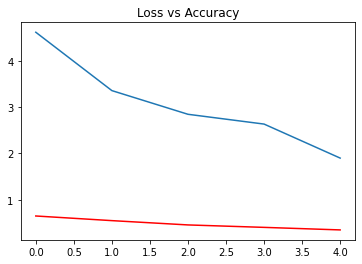

In [25]:
import matplotlib.pyplot as plt
h=history.history
h.keys()
plt.plot(h['loss'])
plt.plot(h['accuracy'],c='r')
plt.title("Loss vs Accuracy")

# Model 1 - Softmax activation function

In [26]:
model1 = Sequential()
model1.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model1.add(MaxPooling2D(pool_size=(4,4)))
# REPEAT CONV AND POOLING layer 3 TIMES
model1.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(4,4)))
#model1.add(Conv2D(128, (5,5),padding='valid',activation='relu'))
# model1.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
# model1.add(MaxPooling2D(pool_size=(4,4)))
model1.add(Flatten())
#model1.add(Dense(128,activation='relu'))
#model1.add(Dense(64,activation='relu'))
model1.add(Dense(2,activation='softmax'))

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_282 (Conv2D)         (None, 220, 220, 10)      760       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 55, 55, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_283 (Conv2D)         (None, 51, 51, 12)        3012      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 12)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1728)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 3

In [28]:
from tensorflow.keras.losses import CategoricalCrossentropy
model1.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [29]:
history = model1.fit( 
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5
14/14 [==============================] - 110s 8s/step - loss: 0.5529 - accuracy: 0.7307 - val_loss: 0.4094 - val_accuracy: 0.8316
Epoch 2/5
14/14 [==============================] - 107s 8s/step - loss: 0.3167 - accuracy: 0.8783 - val_loss: 0.2581 - val_accuracy: 0.9097
Epoch 3/5
14/14 [==============================] - 111s 8s/step - loss: 0.2183 - accuracy: 0.9043 - val_loss: 0.1419 - val_accuracy: 0.9497
Epoch 4/5
14/14 [==============================] - 90s 6s/step - loss: 0.1141 - accuracy: 0.9644 - val_loss: 0.1072 - val_accuracy: 0.9601
Epoch 5/5
14/14 [==============================] - 67s 5s/step - loss: 0.0804 - accuracy: 0.9755 - val_loss: 0.0794 - val_accuracy: 0.9774


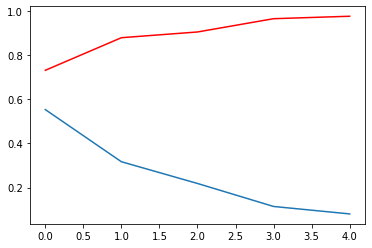

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],c='r')

## Model 1 - sigmoid activation function

In [31]:
#different activation function
model12 = Sequential()
model12.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model12.add(MaxPooling2D(pool_size=(4,4)))
# REPEAT CONV AND POOLING layer 3 TIMES
model12.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model12.add(MaxPooling2D(pool_size=(4,4)))
#model1.add(Conv2D(128, (5,5),padding='valid',activation='relu'))
# model1.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
# model1.add(MaxPooling2D(pool_size=(4,4)))
model12.add(Flatten())
#model1.add(Dense(128,activation='relu'))
#model1.add(Dense(64,activation='relu'))
model12.add(Dense(2,activation='sigmoid'))

In [32]:
model12.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_284 (Conv2D)         (None, 220, 220, 10)      760       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 55, 55, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_285 (Conv2D)         (None, 51, 51, 12)        3012      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 12)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1728)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                

In [33]:
from tensorflow.keras.losses import CategoricalCrossentropy
model12.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [34]:
history = model12.fit( 
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5
14/14 [==============================] - 94s 7s/step - loss: 0.6286 - accuracy: 0.6528 - val_loss: 0.4848 - val_accuracy: 0.8333
Epoch 2/5
14/14 [==============================] - 96s 7s/step - loss: 0.4149 - accuracy: 0.8323 - val_loss: 0.3292 - val_accuracy: 0.8594
Epoch 3/5
14/14 [==============================] - 106s 8s/step - loss: 0.2936 - accuracy: 0.8731 - val_loss: 0.2820 - val_accuracy: 0.8819
Epoch 4/5
14/14 [==============================] - 105s 8s/step - loss: 0.2271 - accuracy: 0.9102 - val_loss: 0.1672 - val_accuracy: 0.9462
Epoch 5/5
14/14 [==============================] - 96s 7s/step - loss: 0.1500 - accuracy: 0.9458 - val_loss: 0.1143 - val_accuracy: 0.9601


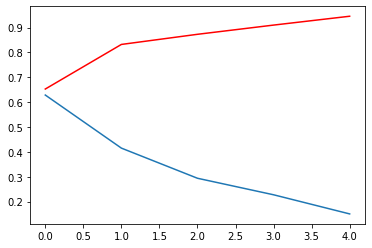

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],c='r')

# Model2 - Softmax activation function

In [36]:
model2 = Sequential()
model2.add(Conv2D(12, (6,6),padding='valid',activation='relu',input_shape=(224,224,3)))
model2.add(MaxPooling2D(pool_size=(6,6)))
model2.add(Conv2D(15, (5,5),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(5,5)))
model2.add(Conv2D(10, (3,3),padding='valid',activation='relu'))
# model2.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Flatten())
#model2.add(Dense(128,activation='relu'))
#model2.add(Dense(64,activation='relu'))
model2.add(Dense(2,activation='softmax'))

In [37]:
from tensorflow.keras.losses import CategoricalCrossentropy
model2.compile(optimizer='adam',loss=CategoricalCrossentropy(),metrics=['accuracy'])
history = model2.fit(train_it,validation_data=val_it,epochs=8)

Epoch 1/8
14/14 [==============================] - 113s 8s/step - loss: 0.5962 - accuracy: 0.7463 - val_loss: 0.4907 - val_accuracy: 0.7778
Epoch 2/8
14/14 [==============================] - 104s 7s/step - loss: 0.4252 - accuracy: 0.8212 - val_loss: 0.3166 - val_accuracy: 0.8733
Epoch 3/8
14/14 [==============================] - 108s 8s/step - loss: 0.2562 - accuracy: 0.9191 - val_loss: 0.2257 - val_accuracy: 0.8924
Epoch 4/8
14/14 [==============================] - 124s 9s/step - loss: 0.1625 - accuracy: 0.9518 - val_loss: 0.0954 - val_accuracy: 0.9809
Epoch 5/8
14/14 [==============================] - 130s 9s/step - loss: 0.1077 - accuracy: 0.9659 - val_loss: 0.0744 - val_accuracy: 0.9809
Epoch 6/8
14/14 [==============================] - 126s 9s/step - loss: 0.0587 - accuracy: 0.9866 - val_loss: 0.0478 - val_accuracy: 0.9861
Epoch 7/8
14/14 [==============================] - 127s 9s/step - loss: 0.0544 - accuracy: 0.9844 - val_loss: 0.0404 - val_accuracy: 0.9896
Epoch 8/8
14/14 [===

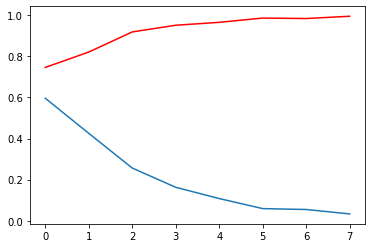

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],c='r')

## Model2 - Sigmoid activation function

In [39]:
model22 = Sequential()
model22.add(Conv2D(12, (6,6),padding='valid',activation='relu',input_shape=(224,224,3)))
model22.add(MaxPooling2D(pool_size=(6,6)))
model22.add(Conv2D(15, (5,5),padding='valid',activation='relu'))
model22.add(MaxPooling2D(pool_size=(5,5)))
model22.add(Conv2D(10, (3,3),padding='valid',activation='relu'))
# model2.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model22.add(MaxPooling2D(pool_size=(3,3)))
model22.add(Flatten())
#model2.add(Dense(128,activation='relu'))
#model2.add(Dense(64,activation='relu'))
model22.add(Dense(2,activation='sigmoid'))

In [40]:
from tensorflow.keras.losses import CategoricalCrossentropy
model22.compile(optimizer='adam',loss=CategoricalCrossentropy(),metrics=['accuracy'])
history = model22.fit(train_it,validation_data=val_it,epochs=8)

Epoch 1/8
14/14 [==============================] - 131s 10s/step - loss: 0.6458 - accuracy: 0.6395 - val_loss: 0.6076 - val_accuracy: 0.8472
Epoch 2/8
14/14 [==============================] - 118s 8s/step - loss: 0.5496 - accuracy: 0.7938 - val_loss: 0.4440 - val_accuracy: 0.8767
Epoch 3/8
14/14 [==============================] - 125s 9s/step - loss: 0.3521 - accuracy: 0.9177 - val_loss: 0.2471 - val_accuracy: 0.9306
Epoch 4/8
14/14 [==============================] - 131s 9s/step - loss: 0.1685 - accuracy: 0.9696 - val_loss: 0.1172 - val_accuracy: 0.9705
Epoch 5/8
14/14 [==============================] - 122s 9s/step - loss: 0.0851 - accuracy: 0.9822 - val_loss: 0.0760 - val_accuracy: 0.9757
Epoch 6/8
14/14 [==============================] - 117s 8s/step - loss: 0.0610 - accuracy: 0.9829 - val_loss: 0.0564 - val_accuracy: 0.9844
Epoch 7/8
14/14 [==============================] - 117s 8s/step - loss: 0.0459 - accuracy: 0.9881 - val_loss: 0.0278 - val_accuracy: 0.9965
Epoch 8/8
14/14 [==

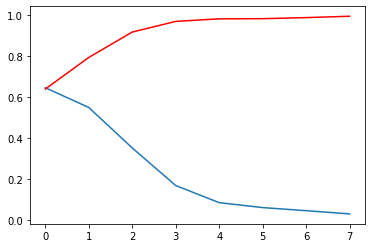

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],c='r')

# Model 3 - Softmax activation function

In [42]:
model3 = Sequential()
model3.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Conv2D(5, (3,3),padding='valid',activation='relu'))
# model3.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(3,3)))
model3.add(Flatten())
#model3.add(Dense(128,activation='relu'))
#model3.add(Dense(64,activation='relu'))
model3.add(Dense(2,activation='softmax'))

In [43]:
from tensorflow.keras.losses import CategoricalCrossentropy
model3.compile(optimizer='adam',loss=CategoricalCrossentropy(),metrics=['accuracy'])
history = model3.fit(train_it,validation_data=val_it,epochs=6)

Epoch 1/6
14/14 [==============================] - 115s 8s/step - loss: 0.6663 - accuracy: 0.5957 - val_loss: 0.6443 - val_accuracy: 0.6076
Epoch 2/6
14/14 [==============================] - 102s 7s/step - loss: 0.6311 - accuracy: 0.6358 - val_loss: 0.5966 - val_accuracy: 0.7257
Epoch 3/6
14/14 [==============================] - 100s 7s/step - loss: 0.5548 - accuracy: 0.7455 - val_loss: 0.4936 - val_accuracy: 0.7882
Epoch 4/6
14/14 [==============================] - 116s 8s/step - loss: 0.4462 - accuracy: 0.7930 - val_loss: 0.3968 - val_accuracy: 0.8490
Epoch 5/6
14/14 [==============================] - 131s 9s/step - loss: 0.3453 - accuracy: 0.8516 - val_loss: 0.2706 - val_accuracy: 0.9062
Epoch 6/6
14/14 [==============================] - 138s 10s/step - loss: 0.2357 - accuracy: 0.9154 - val_loss: 0.1771 - val_accuracy: 0.9375


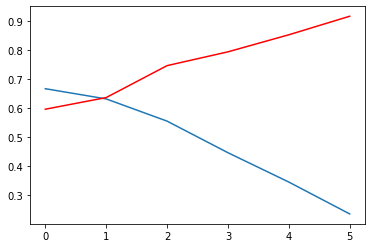

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],c='r')

## Model 3 - Sigmoid activation function

In [45]:
model32 = Sequential()
model32.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model32.add(MaxPooling2D(pool_size=(4,4)))
model32.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model32.add(MaxPooling2D(pool_size=(4,4)))
model32.add(Conv2D(5, (3,3),padding='valid',activation='relu'))
# model3.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model32.add(MaxPooling2D(pool_size=(3,3)))
model32.add(Flatten())
#model3.add(Dense(128,activation='relu'))
#model3.add(Dense(64,activation='relu'))
model32.add(Dense(2,activation='sigmoid'))

In [46]:
from tensorflow.keras.losses import CategoricalCrossentropy
model32.compile(optimizer='adam',loss=CategoricalCrossentropy(),metrics=['accuracy'])
history = model32.fit(train_it,validation_data=val_it,epochs=6)

Epoch 1/6
14/14 [==============================] - 129s 9s/step - loss: 0.6707 - accuracy: 0.6091 - val_loss: 0.6504 - val_accuracy: 0.6215
Epoch 2/6
14/14 [==============================] - 130s 9s/step - loss: 0.6218 - accuracy: 0.6855 - val_loss: 0.5695 - val_accuracy: 0.7465
Epoch 3/6
14/14 [==============================] - 126s 9s/step - loss: 0.5385 - accuracy: 0.7530 - val_loss: 0.4908 - val_accuracy: 0.7691
Epoch 4/6
14/14 [==============================] - 111s 8s/step - loss: 0.4347 - accuracy: 0.8093 - val_loss: 0.3859 - val_accuracy: 0.8316
Epoch 5/6
14/14 [==============================] - 104s 7s/step - loss: 0.3469 - accuracy: 0.8516 - val_loss: 0.2959 - val_accuracy: 0.8767
Epoch 6/6
14/14 [==============================] - 81s 6s/step - loss: 0.2617 - accuracy: 0.8961 - val_loss: 0.2266 - val_accuracy: 0.9236


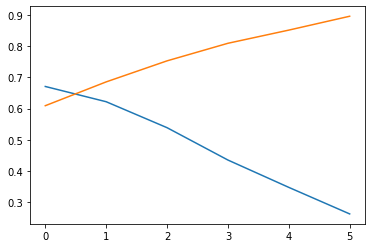

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

# Model 4 - Softmax activation function

In [48]:
model4 = Sequential()
model4.add(Conv2D(12, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model4.add(MaxPooling2D(pool_size=(4,4)))
model4.add(Conv2D(10, (5,5),padding='valid',activation='relu'))
model4.add(MaxPooling2D(pool_size=(4,4)))
model4.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model4.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model4.add(MaxPooling2D(pool_size=(3,3)))
model4.add(Flatten())
#model4.add(Dense(128,activation='relu'))
#model4.add(Dense(64,activation='relu'))
model4.add(Dense(2,activation='softmax'))

In [49]:
from tensorflow.keras.losses import CategoricalCrossentropy
model4.compile(optimizer='adam',loss=CategoricalCrossentropy(),metrics=['accuracy'])
history = model4.fit(train_it,validation_data=val_it,epochs=6)

Epoch 1/6
14/14 [==============================] - 74s 5s/step - loss: 0.7040 - accuracy: 0.5111 - val_loss: 0.6795 - val_accuracy: 0.8438
Epoch 2/6
14/14 [==============================] - 74s 5s/step - loss: 0.6622 - accuracy: 0.7760 - val_loss: 0.6250 - val_accuracy: 0.8299
Epoch 3/6
14/14 [==============================] - 68s 5s/step - loss: 0.5692 - accuracy: 0.8346 - val_loss: 0.4784 - val_accuracy: 0.9288
Epoch 4/6
14/14 [==============================] - 77s 6s/step - loss: 0.3753 - accuracy: 0.9258 - val_loss: 0.2192 - val_accuracy: 0.9514
Epoch 5/6
14/14 [==============================] - 71s 5s/step - loss: 0.1698 - accuracy: 0.9555 - val_loss: 0.1341 - val_accuracy: 0.9635
Epoch 6/6
14/14 [==============================] - 75s 5s/step - loss: 0.1057 - accuracy: 0.9659 - val_loss: 0.0874 - val_accuracy: 0.9705


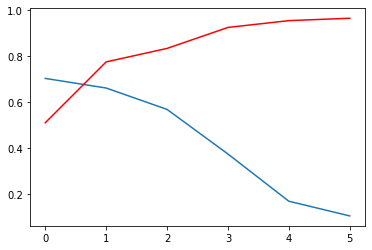

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],c='r')

## Model 4 - Sigmoid activation function

In [51]:
model42 = Sequential()
model42.add(Conv2D(12, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model42.add(MaxPooling2D(pool_size=(4,4)))
model42.add(Conv2D(10, (5,5),padding='valid',activation='relu'))
model42.add(MaxPooling2D(pool_size=(4,4)))
model42.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model4.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model42.add(MaxPooling2D(pool_size=(3,3)))
model42.add(Flatten())
#model4.add(Dense(128,activation='relu'))
#model4.add(Dense(64,activation='relu'))
model42.add(Dense(2,activation='sigmoid'))

In [52]:
from tensorflow.keras.losses import CategoricalCrossentropy
model42.compile(optimizer='adam',loss=CategoricalCrossentropy(),metrics=['accuracy'])
history = model42.fit(train_it,validation_data=val_it,epochs=6)

Epoch 1/6
14/14 [==============================] - 101s 7s/step - loss: 0.6299 - accuracy: 0.7263 - val_loss: 0.5589 - val_accuracy: 0.7569
Epoch 2/6
14/14 [==============================] - 73s 5s/step - loss: 0.4677 - accuracy: 0.8680 - val_loss: 0.3290 - val_accuracy: 0.9201
Epoch 3/6
14/14 [==============================] - 73s 5s/step - loss: 0.2580 - accuracy: 0.9288 - val_loss: 0.1654 - val_accuracy: 0.9531
Epoch 4/6
14/14 [==============================] - 74s 5s/step - loss: 0.1419 - accuracy: 0.9525 - val_loss: 0.1556 - val_accuracy: 0.9392
Epoch 5/6
14/14 [==============================] - 74s 5s/step - loss: 0.0813 - accuracy: 0.9792 - val_loss: 0.0730 - val_accuracy: 0.9844
Epoch 6/6
14/14 [==============================] - 82s 6s/step - loss: 0.0575 - accuracy: 0.9822 - val_loss: 0.0534 - val_accuracy: 0.9826


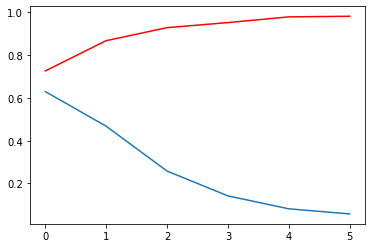

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],c='r')

# Model 5 - Softmax activation function

In [54]:
model5 = Sequential()
model5.add(Conv2D(15, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model5.add(MaxPooling2D(pool_size=(5,5)))
model5.add(Conv2D(12, (4,4),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(4,4)))
model5.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model5.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(3,3)))
model5.add(Flatten())
#model5.add(Dense(128,activation='relu'))
#model5.add(Dense(64,activation='relu'))
model5.add(Dense(2,activation='softmax'))

In [55]:
from tensorflow.keras.losses import CategoricalCrossentropy
model5.compile(optimizer='adam',loss=CategoricalCrossentropy(),metrics=['accuracy'])
history = model5.fit(train_it,validation_data=val_it,epochs=6)

Epoch 1/6
14/14 [==============================] - 65s 5s/step - loss: 0.6715 - accuracy: 0.5764 - val_loss: 0.6368 - val_accuracy: 0.6806
Epoch 2/6
14/14 [==============================] - 76s 5s/step - loss: 0.5866 - accuracy: 0.7552 - val_loss: 0.5275 - val_accuracy: 0.7639
Epoch 3/6
14/14 [==============================] - 75s 5s/step - loss: 0.4541 - accuracy: 0.8531 - val_loss: 0.3336 - val_accuracy: 0.8924
Epoch 4/6
14/14 [==============================] - 72s 5s/step - loss: 0.2876 - accuracy: 0.9058 - val_loss: 0.2069 - val_accuracy: 0.9323
Epoch 5/6
14/14 [==============================] - 75s 5s/step - loss: 0.1783 - accuracy: 0.9414 - val_loss: 0.1611 - val_accuracy: 0.9410
Epoch 6/6
14/14 [==============================] - 74s 5s/step - loss: 0.1186 - accuracy: 0.9599 - val_loss: 0.0922 - val_accuracy: 0.9722


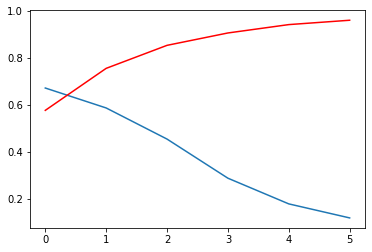

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],c='r')

## Model 5 - Sigmoid activation function

In [57]:
model52 = Sequential()
model52.add(Conv2D(15, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model52.add(MaxPooling2D(pool_size=(5,5)))
model52.add(Conv2D(12, (4,4),padding='valid',activation='relu'))
model52.add(MaxPooling2D(pool_size=(4,4)))
model52.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model5.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model52.add(MaxPooling2D(pool_size=(3,3)))
model52.add(Flatten())
#model5.add(Dense(128,activation='relu'))
#model5.add(Dense(64,activation='relu'))
model52.add(Dense(2,activation='sigmoid'))

In [58]:
from tensorflow.keras.losses import CategoricalCrossentropy
model52.compile(optimizer='adam',loss=CategoricalCrossentropy(),metrics=['accuracy'])
history = model52.fit(train_it,validation_data=val_it,epochs=6)

Epoch 1/6
14/14 [==============================] - 75s 5s/step - loss: 0.6866 - accuracy: 0.5942 - val_loss: 0.6705 - val_accuracy: 0.5955
Epoch 2/6
14/14 [==============================] - 71s 5s/step - loss: 0.6571 - accuracy: 0.5972 - val_loss: 0.6306 - val_accuracy: 0.6545
Epoch 3/6
14/14 [==============================] - 72s 5s/step - loss: 0.5951 - accuracy: 0.7277 - val_loss: 0.5514 - val_accuracy: 0.7483
Epoch 4/6
14/14 [==============================] - 80s 6s/step - loss: 0.4570 - accuracy: 0.8205 - val_loss: 0.3508 - val_accuracy: 0.8750
Epoch 5/6
14/14 [==============================] - 73s 5s/step - loss: 0.2954 - accuracy: 0.8976 - val_loss: 0.1978 - val_accuracy: 0.9392
Epoch 6/6
14/14 [==============================] - 95s 7s/step - loss: 0.1773 - accuracy: 0.9407 - val_loss: 0.1383 - val_accuracy: 0.9635


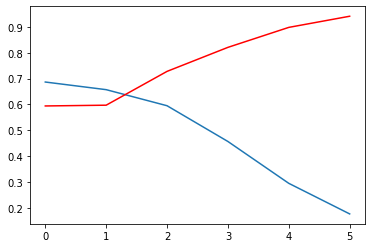

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'],c='r')

# Saving Model

In [60]:
model2.save('model.h5')

In [61]:
from tensorflow import keras
model = keras.models.load_model('model.h5')

## Predicting non-infected

In [72]:
from keras_preprocessing.image import load_img
image = load_img('./1.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
prediction = model.predict(img)

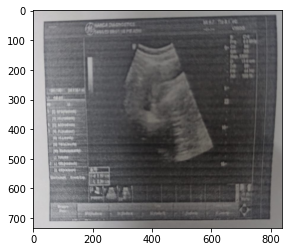

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
img = img.imread('./1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [75]:
print(prediction)

[[0.00146195 0.998538  ]]


In [76]:
l={"infected":prediction[0][0],"notinfected":prediction[0][1]}
def get_key(val):
    for key, value in l.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [77]:
j=prediction.max()
get_key(j)

'notinfected'

## Predicting infected

In [67]:
from keras_preprocessing.image import load_img
image = load_img('./PCOS/data/test/infected/img10.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
prediction = model.predict(img)

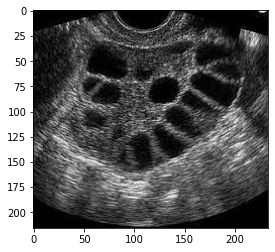

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
img = img.imread('./PCOS/data/test/infected/img10.jpg')
imgplot = plt.imshow(img)
plt.show()

In [69]:
print(prediction)

[[9.996251e-01 3.749150e-04]]


In [70]:
l={"infected":prediction[0][0],"notinfected":prediction[0][1]}
def get_key(val):
    for key, value in l.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [71]:
j=prediction.max()
get_key(j)

'infected'